# Kaggle Competition Report - Island in the sun

Team: Sun Trek  -  Shiwen Chen, Jin Zhou, Rongsheng Zhang

### Abstract

With growing attention and challenge associated with the solar PV, it is of many people's interest to know the number of installed solar PVs. To obtain the data of distributed rooftop solar PVs installed by individuals, this study aims to perform data collection through computer vision algorithm that automatically identify the existence of PV in satellite images. In this study, one approach based on feature extraction has been employed to classify pictures with or without PV pixels. The proposed design is tested to evaluate the feasibility of the algorithm. Simulation result reveals that the proposed approach can correctly classify most of the pictures.

## 1. Introduction

The climate change, which is primarily caused by the emission of greenhouse gases such as carbon dioxide, has become a concern for people from the whole world. According to EPA, the electricity sector accounts for 29% of the greenhouse gas emission in the US (EPA, 2015). State governments and concerned parties are trying to alleviate the impact of power generation on the climate by promoting renewable energy such as wind and solar energy. 

Currently, solar energy only represents a small fraction of the energy mix (0.9% for solar compared with 64% for fossil fuel according to EIA, 2017), but it has the greatest potential as it is abundant and in-exhaustive. However, the growing portion of renewable energy like solar can pose a threat to the reliability of the grid (Zahedi, 2011). The electricity generation for solar PV is intermitted and hard to predict while the power system operator needs precise prediction to keep supply and demand in balance. Moreover, the generation of solar drops suddenly during the sunset and requires fast ramp-up of generation from other sources to make up for the gap, which can be risky and uneconomical.

There are several methods to address this reliability challenge, including installation energy storage. However, before taking any measures, it is crucial to get the capacity data of installed solar PV. This data is hard to obtain because many solar PVs are installed on rooftops by individuals. This study aims to collect the rooftop PV installation data from satellite imagery with a computer algorithm. This algorithm can determine whether the rooftop PV is installed by inputting a satellite image of the house, thus realizing the data collection in an automatic and fast manner.


## 2. Background

This section will discuss some of the existing research on related topics and introduce their algorithms so that they can be taken as a comparison to our method. In particular, Section 2.1 will basically discuss a popular model used in panel detection and will talk about a recent work using this method to handle this problem. Section 2.2 will discuss another recent research that uses a different method which inspires us on our panel detection design.

### 2.1 Convolutional Neural Network (CNN) in Panel Detection

CNN is a popular method that develops the ideas of both Neocognitron, introduced by Fukushima, and weight-sharing networks. The convolutional neural network puts together the following three advanced approaches: local receptive field, shared weights and spatial subsampling. Basically, CNN model will always contain several layers, such as convolutional layers, pooling layers and fully-connected layers, followed by a classifier to get its prediction of the input features. Recent works have shown that CNN has a convincing advantage on ROC performance. The study by Golovko et al. explores the possibility to use multi-layers to construct the CNN model so as to get a satisfying result on panel detection. It employs three convolutional-pooling layers, followed by three fully-connected layers, to transform a 200x200-pixels figure to a single output signal. By utilizing this method, this design can achieve an AUC of 0.92 and its F1-measure is 0.86 (Golovko et al., 2017).

### 2.2 Feature Extraction Method in Panel Detection

In the study by Malof et al., the authors talk about a well-designed feature extraction method. Generally, the origin figure will be in a relatively large size and it is hard for the detector to compute on such a large size of data. To lower the computing complexity, a window-based feature extraction method has been proposed. In particular, each figure will be divided into multiple 3x3 small windows and the detector will focus on the center window and its 8 surrounding windows and extracts their mean and variance in RGB matrix to form a feature vector. By combing this method with Random Forest classifier, the design proposed can achieve an R-value of 0.6 (Malof et al., 2016).

## 3. Data

This section will generally introduce the dataset we are interested in. The data is tif-format satellite images with three color channels (RGB: red, green, and blue).  The size of each picture is 101 * 101 pixels. Most of the image data contain rooftops of houses. Some examples are shown below:
  
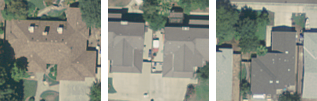
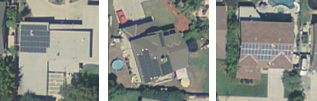
<center>*Figure 1. training image without solar PV (top), training image that contains solar PV (bottom)*</center>

The training dataset contains in total 1,500 images, among which about one-third of the images contain solar PV (505 images). From the examples in figure 1, we can see that the content of the image is highly variable. For instance, the proportion of vegetation, the color of the roof, and objects such as pools and cars varies for each image. This high variance implies that some features derived from the whole picture (e.g. average color of the picture) may not serve as very ideal features for our classifier.

The bottom row of figure 1 shows some characteristics of solar PVs such as being darker (has lower RGB values) comparing with most of the objects in picture. However, the shadows in the picture are also dark and can be confused with PV when using the darker color of PVs as features. While a single cell of the solar PV has a rectangular shape, the shapes of whole solar PV array tend to be irregular. However, the total areas of the solar PVs have a relatively small variance among images. There are also recognizable patterns within the solar PVs, which can be potentially denoted by the variance of color within the PV array.

## 4. Methods

In this section, details about our proposed algorithm will be presented. At first, we will give an overview of the processing steps, then delve into every step one by one.

### 4.1 Algorithm Overview.

Our algorithms have 3 major steps, as illustrated in Figure 2.

1. Preprocessing. In this step, we use the original RGB image as input and erase as many irrelevant regions as possible by using Felzenszwalb's Graph-based image segmentation.

2. Feature extraction. The process of feature extraction turns a 3-channel RGB image to $1\times M$-array, which is the input of classifier training. Our extracted features consist of characteristics about colors, size, and distribution.

3. Logistic Regression. Here we are fitting our dataset into 2 classes using many features. Logistic Regression is therefore a good choice to produce binary result and to regularize features.

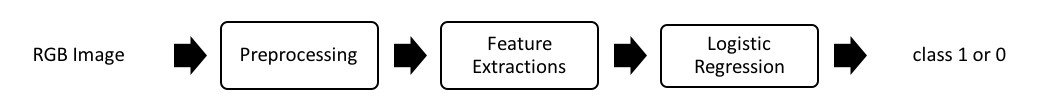
<center>*Figure 2. Steps of classification algorithm*</center>


### 4.2 Preprocessing.

In this step, we first segment an image into regions, and here we use Felzenszwalb's method which measures the evidence for a boundary between two regions using a greedy graph-based representation(Felzenszwalb et al., 2004). Compared with other methods, this algorithm is easy to implement and also has a nice accuracy. The comparison between Felzenszwalb's method and other methods, which are Slic and Watershed) are shown as Figure 3.

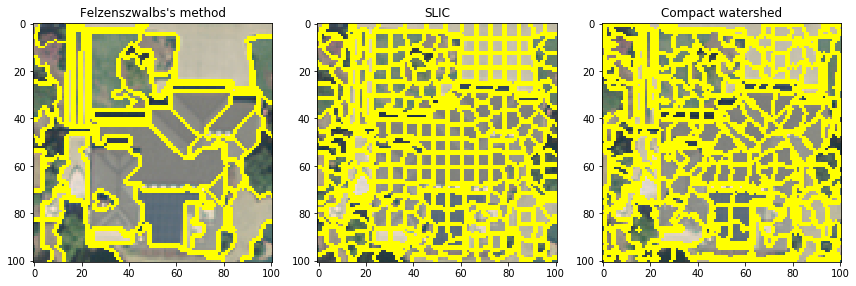
<center>*Figure 3. Segmentation with different methods*</center>

After applying Felzenszwalb's method, the image has been segmented into many different regions. Also, as we've discussed in section 4, the average RGB values of solar photovoltaic arrays are to some extent larger than the average values of other regions. Therefore, we can set a threshold to filter the irrelevant regions. However, the luminous intensity differs from image to image. So instead of setting a threshold value, we set a ratio value 0.7, which means we will filter 70% regions of the image. An example of result is shown in Figure 4.

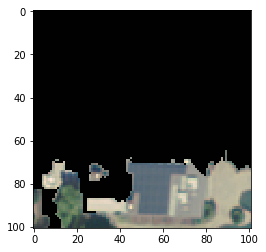
<center>*Figure 4. Sample image after 70% luminous filter*</center>


### 4.3 Features Extraction

The input for features extraction is a 3-channel RGB image, which will be turned into a $1\times M$ array. The first 2 features we want to use are the mean and standard variance of the original image, which is a $1\times6$ array. Then, in preprocessing, we can get the number of regions that the image can be segmented, and generate a new image with less irrelevant regions, get its mean and standard variance, with the number regions we mentioned above, we have another 3 features, a $1\times7$ array. 

Even though the luminous intensity affects the RGB values of the image, we can see the RGB values of solar PV arrays of different images still have some similarities. We pick 10 images with PV arrays, and segment the PV arrays out, get the mean RGB values of them, which is PV_RGB = [99.84, 111.64, 120.47]. Then we can pick the region in the preprocessed image which has the closest RGB to PV_RGB, the RGB distance between the region and PV_RGB can be used as another feature. And, for that region, we can get its RGB mean, standard variance and pixels numbers, which are another 3 features, a $1\times7$ array. 

Here, we can see that the value of M is 21. The features we will use to train is a $1\times21$ array.

### 4.4 Logistic Regression

Logistic regression is one of the most common and efficient ways to find the best fitting (yet biologically reasonable) model to describe the relationship between the dichotomous characteristic of response and a set of independent variables. Since the results we will get are binary that '1' means the image contains PV and '0' stands for no PV in image, Logistic regression is an ideal choice. Moreover, by including the regularization term in logistic regression, we can reduce the potential high variance caused by large number of features. 

## 5. Results

In this section, we will set up a simulation platform in Python 3.0 and present the simulation result of our panel detection design. To better evaluate the performance of our design, we will compare it with two other classifiers to verify the advantages of our method.

### 5.1 Simulation Parameters

In the simulation, we set the reference RGB value as 99.84, 111.64 and 120.47, which is generally a mean value of the panel pixels in 10 different images. This reference value is tested using some of the remaining images with PVs that, for most of the times, the reference value is closest to the PV region among all regions.

Another parameter setting that need to be mentioned here is the percentage of the 'unrelated' pixels that we choose to discard. In particular, we choose to discard 70% of the pixels that have a relatively high RGB values. 70% is a number which has the best performance during our experiment.

### 5.2 Cross Validation

Cross validation is method that have been widely used in machine learning field. Basically, cross validation will split the dataset into several folders and for each time of the validation, one specific folder will be used as test dataset and the remaining will be seen as training dataset.
In this experiment, we choose to set the split number as 20, which is reasonable number for that the overall dataset has 1500 samples and dividing it into 20 folders will make a rational number of training and testing dataset, without suffering from high computing complexity.

### 5.3 Simulation Result

In this part, we will present our simulation result. To evaluate our performance, we choose to use ROC curve and AUC as our evaluation metrics. Apart from the proposed design, we take two other classifiers as comparison, to better verify the performance advantages. These two classifiers are set as following: 

1) a classifier that will randomly guess the label of each figure; 

2) a classifier that will regard all figures as non-pv figures.

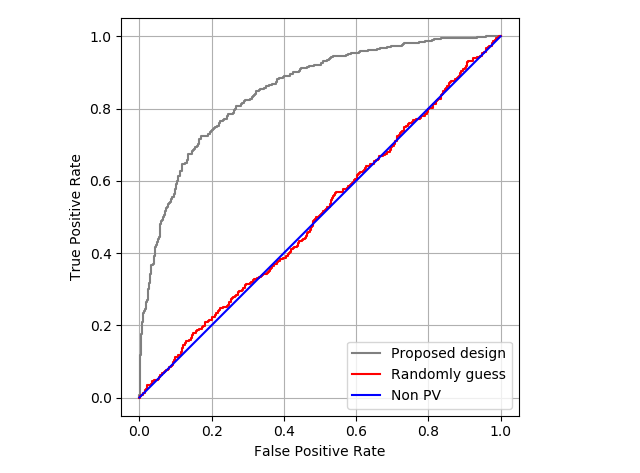

<center>*Figure 5. ROC of different methods*</center>

In Figure 5, it is obvious that the design we propose has a significant advantage over the other classifiers, which is reasonable because our design will 'gain knowledge' from the figure and utilize the knowledge to make the decision.

<br />
<center>*Table 1. AUC of different methods*</center>

| Method | AUC |
| :------| :------ |
| Proposed design | 0.851 |
| Randomly guess | 0.498 |
| Non_pv | 0.500 |

In Table 1, we can notice that the AUC of the proposed design is significantly larger than the other two methods, which matches the ROC performance above.

### Conclusions

This paper focuses on the PV panel figure classification problem. To realize fast collection of rooftop PV data, this study developed an classifier algorithm to determine whether the rooftop PV is installed in the satellite image of a house. In the algorithm, images are preprocessed to remove irrelevant information. The features are then extracted from the remaining part to be used as predictors in the Logistic regression. In this study, we extracted 21 features from the image data and results in a ~ 85% accuracy on test data. The AUC of this method is 0.851, indicating an acceptable level of explanatory power of the algorithm. 

As the overall accuracy is not high enough to prove the algorithm an ideaL tool for PV data collection, we propose two ways for future improvement on the basis of the current algorithm:

1.	Exploring on regularization methods and tuning parameter. Among all the features we include in the model, some may have less contribution towards the result, and some may have strong correlation with each other thus being redundant. The regularization methods such as ridge, LASSO, and PCA can reduce the variance caused by those excessive features. The algorithm currently relies on the default l2 penalty type and value of regularization strength. If a good method and tuning parameter is used, the performance can be improved.

2.	Exploring and experimenting on more effective features. Adding decisive features into the algorithm is the key to the improvement of performance. There are many potential features that may be useful. For instance, the background color and the shape of PV panels as used by Malof et al., 2015.

### Roles

**Rongsheng Zhang:**  
At the beginning, he collected some existing papers on related topics and discussed with teammates about the algorithms used in those works. He learned about the basic structure about CNN and got a simulation result with an accuracy of 84%. After the team deciding to use the feature-extraction method, he tried to adjust some parameters to optimize the performance.

**Shiwen Chen:**  
She mainly contributed in the feature extraction part of the study including initial literature reviewing, feature exploration and coding. She developed a set of features that improved the accuracy to 86%.

**Jin Zhou:**  
In our final solution, Jin's work focus on preprocessing the training data. He designed experiments and pick up the most appropriate image segmentation method. Also, in the beginning of the project, he tried PCA+SVM method to help discover the mystery of the project. 

### References

EIA. (2017). Electric Power Monthly. https://www.eia.gov/electricity/monthly/

EPA. (2015). Sources of Greenhouse Gas Emissions. https://www.epa.gov/ghgemissions/sources-greenhouse-gas-emissions
   
Felzenszwalb, P. F., & Huttenlocher, D. P. (2004). Efficient graph-based image segmentation. International journal of computer vision, 59(2), 167-181.

Golovko, V., Bezobrazov, S., Kroshchanka, A., Sachenko, A., Komar, M., & Karachka, A. (2017, September). Convolutional neural network based solar photovoltaic panel detection in satellite photos. In Intelligent Data Acquisition and Advanced Computing Systems: Technology and Applications (IDAACS), 2017 9th IEEE International Conference on (Vol. 1, pp. 14-19). IEEE.

Malof, J. M., Hou, R., Collins, L. M., Bradbury, K., & Newell, R. (2015, November). Automatic solar photovoltaic panel detection in satellite imagery. In Renewable Energy Research and Applications (ICRERA), 2015 International Conference on (pp. 1428-1431). IEEE.

Malof, J. M., Bradbury, K., Collins, L. M., & Newell, R. G. (2016). Automatic detection of solar photovoltaic arrays in high resolution aerial imagery. Applied energy, 183, 229-240.

Zahedi, A. (2011). A review of drivers, benefits, and challenges in integrating renewable energy sources into electricity grid. Renewable and Sustainable Energy Reviews, 15(9), 4775-4779.